Data project brainstroming:

- who is our audience?
- what would they use this for?
- what are best practices?
- if you could have anything, what would you want?

Consider data insights:
- trends (average, median, frequency, over time)

# 0. Import Libraries

In [92]:
import pandas as pd
import numpy as np

# 1. Load Data

- [http://datacamp-community-prod.s3.amazonaws.com/dbed353d-2757-4617-8206-8767ab379ab3][Pandas CheatSheet]

In [93]:
df = pd.read_excel('Quiz_Item_Responses.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8622 entries, 0 to 8621
Data columns (total 3 columns):
Item_ID                8622 non-null object
score_outcome          8622 non-null object
number_of_responses    8622 non-null int64
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [94]:
print(df.head())
#print(df.tail())

,Item_ID,score_outcome,number_of_responses
0,FL01M_CC_L01_01,INCORRECT,81
1,FL01M_CC_L01_01,CORRECT,799
2,FL01M_CC_L01_02,INCORRECT,70
3,FL01M_CC_L01_02,CORRECT,810
4,FL01M_CC_L01_03,INCORRECT,141


In [138]:
df.shape

(8622, 3)

In [139]:
df.index

RangeIndex(start=0, stop=8622, step=1)

In [140]:
df.columns

Index(['Item_ID', 'score_outcome', 'number_of_responses'], dtype='object')

In [141]:
df.count()

Item_ID                8622
score_outcome          8622
number_of_responses    8622
dtype: int64

# 2. Explore Variables

In [95]:
df.describe() 

,number_of_responses
count,8622.000000
mean,797.823127
std,1905.824358
min,1.000000
25%,17.000000
50%,91.000000
75%,470.750000
max,19155.000000


### number_of_responses

In [129]:
df[['Item_ID','number_of_responses']]

,Item_ID,number_of_responses
0,FL01M_CC_L01_01,81
1,FL01M_CC_L01_01,799
2,FL01M_CC_L01_02,70
3,FL01M_CC_L01_02,810
4,FL01M_CC_L01_03,141
...,...,...
8617,NA0KM_CC_U06_EU_03,1
8618,NA0KM_CC_U06_EU_04,1
8619,NA0KM_CC_U06_EU_05,1
8620,NA0KM_CC_U06_EU_06,1


In [96]:
np.sum(df.number_of_responses) # 6878831 total responses

6878831

### Item_ID

In [38]:
len(df.Item_ID.unique()) # 4167 total unique Item_ID

4167

### score_outcome

In [40]:
df.score_outcome.unique() # 3 score_outcome

array(['INCORRECT', 'CORRECT', 'PARTIAL'], dtype=object)

In [100]:
df.score_outcome.value_counts() # correct is the highest score_outcome (4048)

CORRECT      4048
INCORRECT    3899
PARTIAL       675
Name: score_outcome, dtype: int64

# 3. EDA

In [86]:
(df # .query("")
 .groupby(["score_outcome", "Item_ID"])
 .agg('sum'))

number_of_responses
score_outcome Item_ID                                
CORRECT       FL01M_CC_L01_01                     799
              FL01M_CC_L01_02                     810
              FL01M_CC_L01_03                     739
              FL01M_CC_L01_04                     776
              FL01M_CC_L01_05                     782
...                                               ...
PARTIAL       NA0KM_CC_L18_07                       1
              NA0KM_CC_L22_04                      14
              NA0KM_CC_L22_05                      15
              NA0KM_CC_U01_EU_07                 1514
              NA0KM_CC_U04_MU_09                    7

[8622 rows x 1 columns]

In [102]:
(df
 .groupby(["score_outcome", "Item_ID"])
 .agg('sum')
 .unstack())

number_of_responses                                  \
Item_ID           FL01M_CC_L01_01 FL01M_CC_L01_02 FL01M_CC_L01_03   
score_outcome                                                       
CORRECT                     799.0           810.0           739.0   
INCORRECT                    81.0            70.0           141.0   
PARTIAL                       NaN             NaN             NaN   

                                                                               \
Item_ID       FL01M_CC_L01_04 FL01M_CC_L01_05 FL01M_CC_L01_06 FL01M_CC_L01_07   
score_outcome                                                                   
CORRECT                 776.0           782.0           404.0           362.0   
INCORRECT               103.0            97.0            28.0            70.0   
PARTIAL                   NaN             NaN             NaN             NaN   

                                                               ...  \
Item_ID       FL01M_CC_L01_08 FL01M_CC_L01_09 FL01M_CC_L01_10  ...   
score_outcome                                                  ...   
CORRECT                 371.0           358.0           359.0  ...   
INCORRECT                61.0            74.0            73.0  ...   
PARTIAL                   NaN             NaN             NaN  ...   

                                                                        \
Item_ID       NA0KM_CC_U05_EU_08 NA0KM_CC_U05_EU_09 NA0KM_CC_U05_EU_10   
score_outcome                                                            
CORRECT                     53.0               61.0               56.0   
INCORRECT                    9.0                1.0                6.0   
PARTIAL                      NaN                NaN                NaN   

                                                                        \
Item_ID       NA0KM_CC_U06_EU_01 NA0KM_CC_U06_EU_02 NA0KM_CC_U06_EU_03   
score_outcome                                                            
CORRECT                      1.0                1.0                1.0   
INCORRECT                    NaN                NaN                NaN   
PARTIAL                      NaN                NaN                NaN   

                                                                        \
Item_ID       NA0KM_CC_U06_EU_04 NA0KM_CC_U06_EU_05 NA0KM_CC_U06_EU_06   
score_outcome                                                            
CORRECT                      1.0                1.0                1.0   
INCORRECT                    NaN                NaN                NaN   
PARTIAL                      NaN                NaN                NaN   

                                  
Item_ID       NA0KM_CC_U06_EU_07  
score_outcome                     
CORRECT                      1.0  
INCORRECT                    NaN  
PARTIAL                      NaN  

[3 rows x 4167 columns]

In [122]:
top=df.nlargest(50,['number_of_responses']).Item_ID

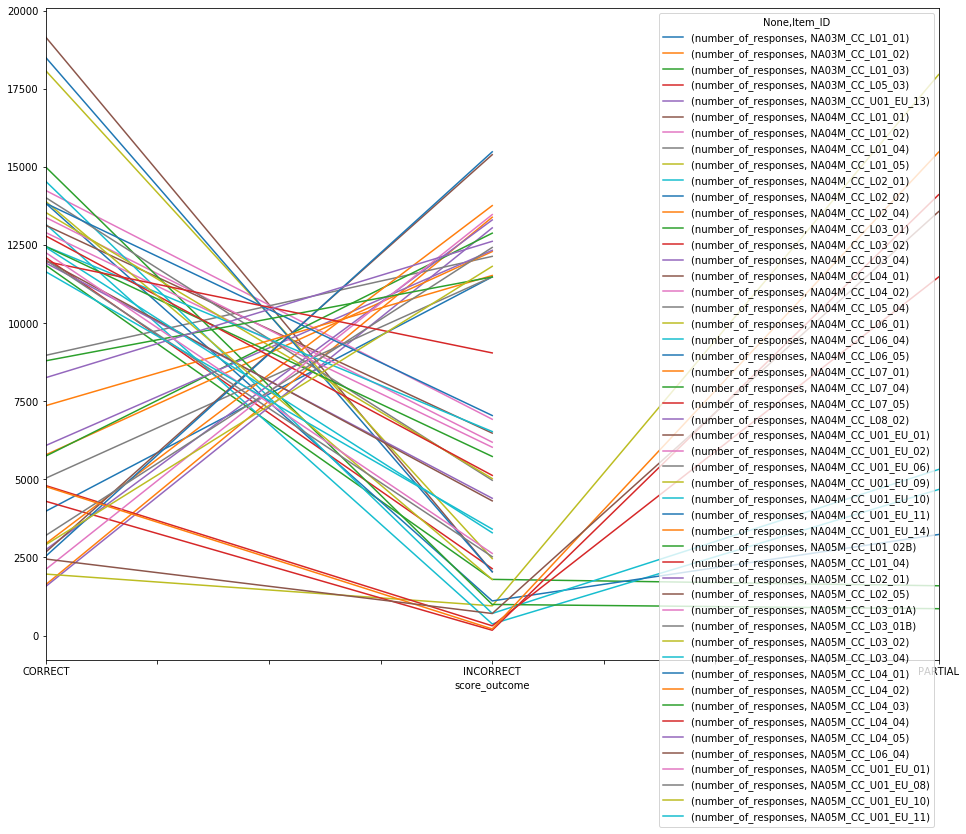

In [124]:
(df.query('Item_ID in @top')
 .groupby(["score_outcome", "Item_ID"])
 .agg('sum')
 .unstack()
 .plot(figsize = (16, 12)))